# Global Sports Footwear Sales Analysis (2018-2026)
## Comprehensive Data Analysis Project

**Goal:** Analyze global sports footwear sales data across key dimensions:

1. **Price Optimization**  - Analyze discounts vs revenue
2. **Customer Segmentation**  - Identify high-value buyers
3. **Trend Analysis**  - Study popular brands, colors, and categories
4. **Sentiment/Rating Analysis**  - Understand product performance

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Set visualization style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')


In [4]:
# Load the dataset
df = pd.read_csv('global_sports_footwear_sales_2018_2026.csv')

print(f"Dataset shape: {df.shape}")
print(f"Total records: {len(df):,}")
print(f"Total columns: {len(df.columns)}")
print(f"\nFirst few rows:")
df.head()

Dataset shape: (30000, 18)
Total records: 30,000
Total columns: 18

First few rows:


,order_id,order_date,brand,model_name,category,gender,size,color,base_price_usd,discount_percent,final_price_usd,units_sold,revenue_usd,payment_method,sales_channel,country,customer_income_level,customer_rating
0,ORD100000,2021-01-30,ASICS,Model-370,Running,Unisex,8,Black,162,15,137.70,1,137.7,Card,Retail Store,Germany,Low,4.6
1,ORD100001,2026-10-05,Reebok,Model-314,Lifestyle,Men,8,Grey,80,5,76.00,3,228.0,Card,Online,USA,Low,3.9
2,ORD100002,2023-11-12,ASICS,Model-763,Lifestyle,Men,8,Black,176,15,149.60,4,598.4,Cash,Retail Store,India,Medium,3.0
3,ORD100003,2026-08-29,Reebok,Model-905,Basketball,Women,7,White,61,15,51.85,2,103.7,Card,Retail Store,India,High,3.4
4,ORD100004,2019-11-09,Nike,Model-413,Training,Men,11,Black,80,0,80.00,4,320.0,Cash,Online,USA,Medium,3.0


In [5]:
# Data structure and types
print("=== Data Information ===")
df.info()

print("\n=== Basic Statistics ===")
df.describe()

=== Data Information ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               30000 non-null  object 
 1   order_date             30000 non-null  object 
 2   brand                  30000 non-null  object 
 3   model_name             30000 non-null  object 
 4   category               30000 non-null  object 
 5   gender                 30000 non-null  object 
 6   size                   30000 non-null  int64  
 7   color                  30000 non-null  object 
 8   base_price_usd         30000 non-null  int64  
 9   discount_percent       30000 non-null  int64  
 10  final_price_usd        30000 non-null  float64
 11  units_sold             30000 non-null  int64  
 12  revenue_usd            30000 non-null  float64
 13  payment_method         30000 non-null  object 
 14  sales_channel          30000 

,size,base_price_usd,discount_percent,final_price_usd,units_sold,revenue_usd,customer_rating
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,8.500867,139.634633,13.332167,121.029035,2.500200,302.714948,4.001543
std,1.710896,46.062549,9.864198,42.511586,1.121149,179.149272,0.577546
min,6.000000,60.000000,0.000000,42.000000,1.000000,42.000000,3.000000
25%,7.000000,100.000000,5.000000,85.000000,1.000000,156.750000,3.500000
50%,9.000000,140.000000,10.000000,119.200000,3.000000,268.200000,4.000000
75%,10.000000,180.000000,20.000000,153.600000,4.000000,414.000000,4.500000
max,11.000000,219.000000,30.000000,219.000000,4.000000,876.000000,5.000000


In [6]:
# Check for missing values
print("=== Missing Values Check ===")
missing = df.isnull().sum()

if missing.sum() == 0:
    print("\n No missing values found! Dataset is complete.")
else:
    missing_pct = (missing / len(df)) * 100
    missing_df = pd.DataFrame({
    'Missing Count': missing,
    'Percentage': missing_pct
    })
    print(missing_df[missing_df['Missing Count'] > 0])

=== Missing Values Check ===

 No missing values found! Dataset is complete.


In [7]:
# Convert date column to datetime and extract useful features
df['order_date'] = pd.to_datetime(df['order_date'])

# Extract date features
df['year'] = df['order_date'].dt.year
df['month'] = df['order_date'].dt.month
df['quarter'] = df['order_date'].dt.quarter
df['month_name'] = df['order_date'].dt.month_name()

print("\nNew features:")
df[['order_date', 'year', 'month','quarter', 'month_name']].head(10)


New features:


,order_date,year,month,quarter,month_name
0,2021-01-30,2021,1,1,January
1,2026-10-05,2026,10,4,October
2,2023-11-12,2023,11,4,November
3,2026-08-29,2026,8,3,August
4,2019-11-09,2019,11,4,November
5,2021-08-27,2021,8,3,August
6,2019-02-21,2019,2,1,February
7,2020-05-17,2020,5,2,May
8,2022-03-30,2022,3,1,March
9,2026-03-11,2026,3,1,March


---
## Analysis 1: Price Optimization 💰

**Goal:** Analyze the impact of discounts on revenue

**Why it matters:**
- Determine the optimal discount level
- Maximize revenue without sacrificing margins
- Avoid excessive discounting that erodes profits
- Understand customer price sensitivity

**How we do it:**
1. Segment sales by discount levels (0%, 1-10%, 11-20%, etc.)
2. Compare sales volume and revenue at each discount level
3. Calculate revenue per order to find the sweet spot
4. Analyze the ROI of different discount strategies

**Key Question:** What discount level generates the most total revenue?

In [11]:
# Analyze discount distribution
print("=== Discount Statistics ===")
print(df['discount_percent'].describe())
print(f"\nDiscounts range from {df['discount_percent'].min()}% to {df['discount_percent'].max()}%")

# Create discount bins
df['discount_bin'] = pd.cut(df['discount_percent'], 
                             bins=[-1, 0, 10, 20, 30],
                             labels=['No Discount', '1-10%', '11-20%', '21-30%'])

# Analyze by discount level
discount_analysis = df.groupby('discount_bin').agg({
    'order_id': 'count',
    'revenue_usd': 'sum',
    'units_sold': 'sum',
    'final_price_usd': 'mean',
    'base_price_usd': 'mean'
}).reset_index()

discount_analysis.columns = ['Discount Range', 'Order Count', 'Total Revenue', 
                              'Total Units', 'Avg Final Price', 'Avg Base Price']
discount_analysis['Revenue per Order'] = discount_analysis['Total Revenue'] / discount_analysis['Order Count']
discount_analysis['Units per Order'] = discount_analysis['Total Units'] / discount_analysis['Order Count']

print("\n=== Discount Impact Analysis ===")
print(discount_analysis)

print("\n EXPLANATION:")
print("This table shows how each discount level performs.")
print("'Revenue per Order' is key - it shows average revenue from each transaction.")
print("'Units per Order' shows if discounts encourage buying more items.")

=== Discount Statistics ===
count    30000.000000
mean        13.332167
std          9.864198
min          0.000000
25%          5.000000
50%         10.000000
75%         20.000000
max         30.000000
Name: discount_percent, dtype: float64

Discounts range from 0% to 30%

=== Discount Impact Analysis ===
  Discount Range  Order Count  Total Revenue  Total Units  Avg Final Price  \
0    No Discount         4971     1723813.00        12366       139.646349   
1          1-10%        10063     3260295.65        25175       129.384155   
2         11-20%         9963     2871210.00        24894       115.169316   
3         21-30%         5003     1226129.80        12571        97.394443   

   Avg Base Price  Revenue per Order  Units per Order  
0      139.646349         346.773889         2.487628  
1      139.834145         323.988438         2.501739  
2      139.678209         288.187293         2.498645  
3      139.134919         245.078913         2.512692  

 EXPLANATION:
This 

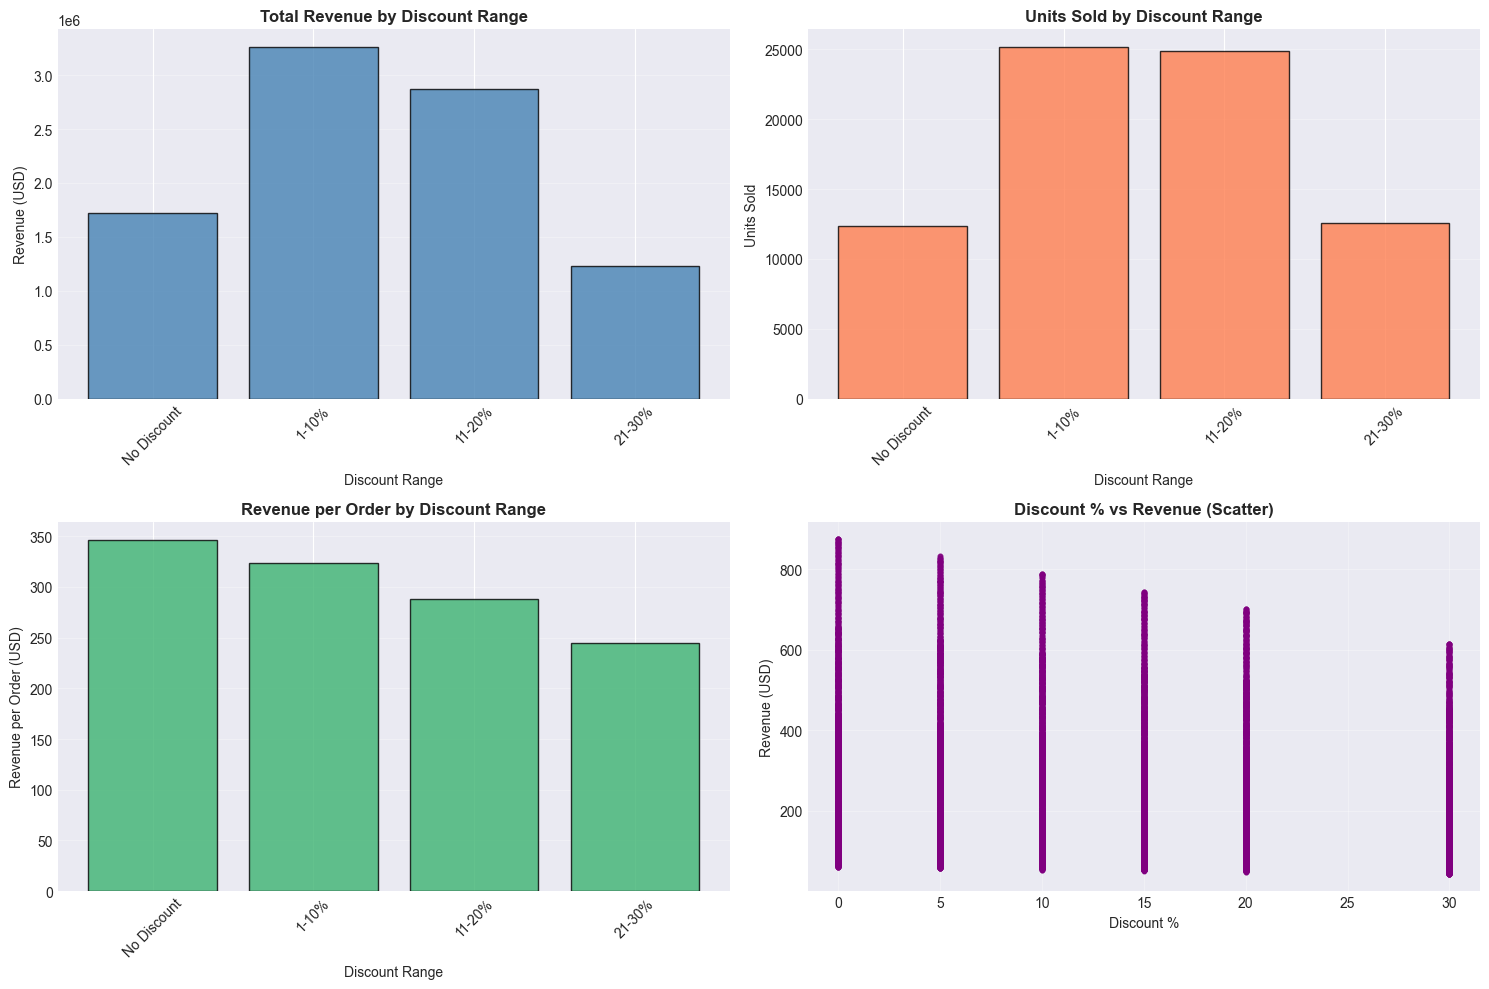


📊 EXPLANATION:
Top left: Total revenue generated at each discount level
Top right: Total units sold - higher discounts may drive more volume
Bottom left: THIS IS KEY - shows which discount level brings highest average revenue per transaction
Bottom right: Shows the relationship between discount size and individual order revenue


In [27]:
# Visualize discount impact
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# 1. Revenue by discount range
axes[0, 0].bar(discount_analysis['Discount Range'], 
               discount_analysis['Total Revenue'],
               color='steelblue', alpha=0.8, edgecolor='black')
axes[0, 0].set_title('Total Revenue by Discount Range', fontweight='bold', fontsize=12)
axes[0, 0].set_xlabel('Discount Range')
axes[0, 0].set_ylabel('Revenue (USD)')
axes[0, 0].tick_params(axis='x', rotation=45)
axes[0, 0].grid(axis='y', alpha=0.3)

# 2. Units sold by discount range
axes[0, 1].bar(discount_analysis['Discount Range'], 
               discount_analysis['Total Units'],
               color='coral', alpha=0.8, edgecolor='black')
axes[0, 1].set_title('Units Sold by Discount Range', fontweight='bold', fontsize=12)
axes[0, 1].set_xlabel('Discount Range')
axes[0, 1].set_ylabel('Units Sold')
axes[0, 1].tick_params(axis='x', rotation=45)
axes[0, 1].grid(axis='y', alpha=0.3)

# 3. Revenue per order
axes[1, 0].bar(discount_analysis['Discount Range'], 
               discount_analysis['Revenue per Order'],
               color='mediumseagreen', alpha=0.8, edgecolor='black')
axes[1, 0].set_title('Revenue per Order by Discount Range', fontweight='bold', fontsize=12)
axes[1, 0].set_xlabel('Discount Range')
axes[1, 0].set_ylabel('Revenue per Order (USD)')
axes[1, 0].tick_params(axis='x', rotation=45)
axes[1, 0].grid(axis='y', alpha=0.3)

# 4. Scatter: discount vs revenue
axes[1, 1].scatter(df['discount_percent'], df['revenue_usd'], 
                   alpha=0.3, s=10, color='purple')
axes[1, 1].set_title('Discount % vs Revenue (Scatter)', fontweight='bold', fontsize=12)
axes[1, 1].set_xlabel('Discount %')
axes[1, 1].set_ylabel('Revenue (USD)')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n EXPLANATION:")
print("Top left: Total revenue generated at each discount level")
print("Top right: Total units sold - higher discounts may drive more volume")
print("Bottom left: THIS IS KEY - shows which discount level brings highest average revenue per transaction")
print("Bottom right: Shows the relationship between discount size and individual order revenue")

In [10]:
# Calculate ROI for each discount level
df['potential_revenue'] = df['base_price_usd'] * df['units_sold']  # Revenue without discount
df['discount_cost'] = df['potential_revenue'] - df['revenue_usd']   # Money lost to discount

roi_by_discount = df.groupby('discount_bin').agg({
    'revenue_usd': 'sum',
    'potential_revenue': 'sum',
    'discount_cost': 'sum',
    'units_sold': 'sum'
}).reset_index()

roi_by_discount.columns = ['Discount Range', 'Actual Revenue', 'Potential Revenue', 
                            'Discount Cost', 'Total Units']
roi_by_discount['Revenue Loss %'] = (roi_by_discount['Discount Cost'] / 
                                     roi_by_discount['Potential Revenue'] * 100)

print("=== ROI Analysis by Discount Level ===")
print(roi_by_discount)

print("\n EXPLANATION:")
print("Potential Revenue: What we would have made at full price")
print("Actual Revenue: What we actually made after discounts")
print("Discount Cost: How much money we gave up")
print("Revenue Loss %: Percentage of potential revenue lost to discounts")
print("\nThe goal is to find the discount level that:")
print("  1. Drives enough sales volume")
print("  2. But doesn't sacrifice too much revenue")

=== ROI Analysis by Discount Level ===
  Discount Range  Actual Revenue  Potential Revenue  Discount Cost  \
0    No Discount      1723813.00            1723813           0.00   
1          1-10%      3260295.65            3523428      263132.35   
2         11-20%      2871210.00            3482873      611663.00   
3         21-30%      1226129.80            1751614      525484.20   

   Total Units  Revenue Loss %  
0        12366        0.000000  
1        25175        7.468078  
2        24894       17.562024  
3        12571       30.000000  

 EXPLANATION:
Potential Revenue: What we would have made at full price
Actual Revenue: What we actually made after discounts
Discount Cost: How much money we gave up
Revenue Loss %: Percentage of potential revenue lost to discounts

The goal is to find the discount level that:
  1. Drives enough sales volume
  2. But doesn't sacrifice too much revenue


In [9]:
# Find the optimal discount range
optimal_idx = discount_analysis['Revenue per Order'].idxmax()
optimal_range = discount_analysis.loc[optimal_idx, 'Discount Range']
optimal_revenue = discount_analysis.loc[optimal_idx, 'Revenue per Order']

print("=== OPTIMAL DISCOUNT STRATEGY ===")
print(f"\nOptimal Discount Range: {optimal_range}")
print(f"Average Revenue per Order: ${optimal_revenue:,.2f}")
print(f"\nRecommendation: Focus promotional discounts in the {optimal_range} range")
print("This range balances sales volume with revenue maximization.")

=== OPTIMAL DISCOUNT STRATEGY ===

Optimal Discount Range: No Discount
Average Revenue per Order: $346.77

Recommendation: Focus promotional discounts in the No Discount range
This range balances sales volume with revenue maximization.


---
## Analysis 2: Customer Segmentation 🧠

**Goal:** Identify high-value customer segments

**Why it matters:**
- Know who your most valuable customers are
- Create personalized marketing strategies
- Allocate resources efficiently
- Increase customer lifetime value

**How we do it:**
1. Segment customers by income level (Low, Medium, High)
2. Analyze revenue contribution from each segment
3. Examine geographic distribution
4. Look at purchasing behavior patterns

**Key Insight:** The 80/20 rule often applies - 20% of customers drive 80% of revenue

In [12]:
# Analyze by income level
income_analysis = df.groupby('customer_income_level').agg({
    'order_id': 'count',
    'revenue_usd': 'sum',
    'units_sold': 'sum',
    'final_price_usd': 'mean',
    'customer_rating': 'mean',
    'discount_percent': 'mean'
}).reset_index()

income_analysis.columns = ['Income Level', 'Total Orders', 'Total Revenue', 
                           'Total Units', 'Avg Transaction Value', 'Avg Rating', 'Avg Discount']
income_analysis['Revenue per Order'] = income_analysis['Total Revenue'] / income_analysis['Total Orders']
income_analysis['Revenue %'] = (income_analysis['Total Revenue'] / 
                                income_analysis['Total Revenue'].sum() * 100)

print("=== Customer Segmentation by Income Level ===")
print(income_analysis)

print("\n=== Revenue Contribution ===")
for _, row in income_analysis.iterrows():
    print(f"{row['Income Level']:6s} Income: {row['Revenue %']:5.1f}% of total revenue")

print("\n EXPLANATION:")
print("This shows which customer segment is most valuable.")
print("Look at 'Revenue %' to see who drives most of your business.")
print("'Revenue per Order' shows how much each segment spends per transaction.")

=== Customer Segmentation by Income Level ===
  Income Level  Total Orders  Total Revenue  Total Units  \
0         High         10059     3037804.30        25196   
1          Low          9944     3040581.20        24966   
2       Medium          9997     3003062.95        24844   

   Avg Transaction Value  Avg Rating  Avg Discount  Revenue per Order  \
0             120.553554    3.997137     13.351228         301.998638   
1             121.855727    4.000553     13.245676         305.770434   
2             120.685156    4.006962     13.399020         300.396414   

   Revenue %  
0  33.450658  
1  33.481236  
2  33.068105  

=== Revenue Contribution ===
High   Income:  33.5% of total revenue
Low    Income:  33.5% of total revenue
Medium Income:  33.1% of total revenue

 EXPLANATION:
This shows which customer segment is most valuable.
Look at 'Revenue %' to see who drives most of your business.
'Revenue per Order' shows how much each segment spends per transaction.


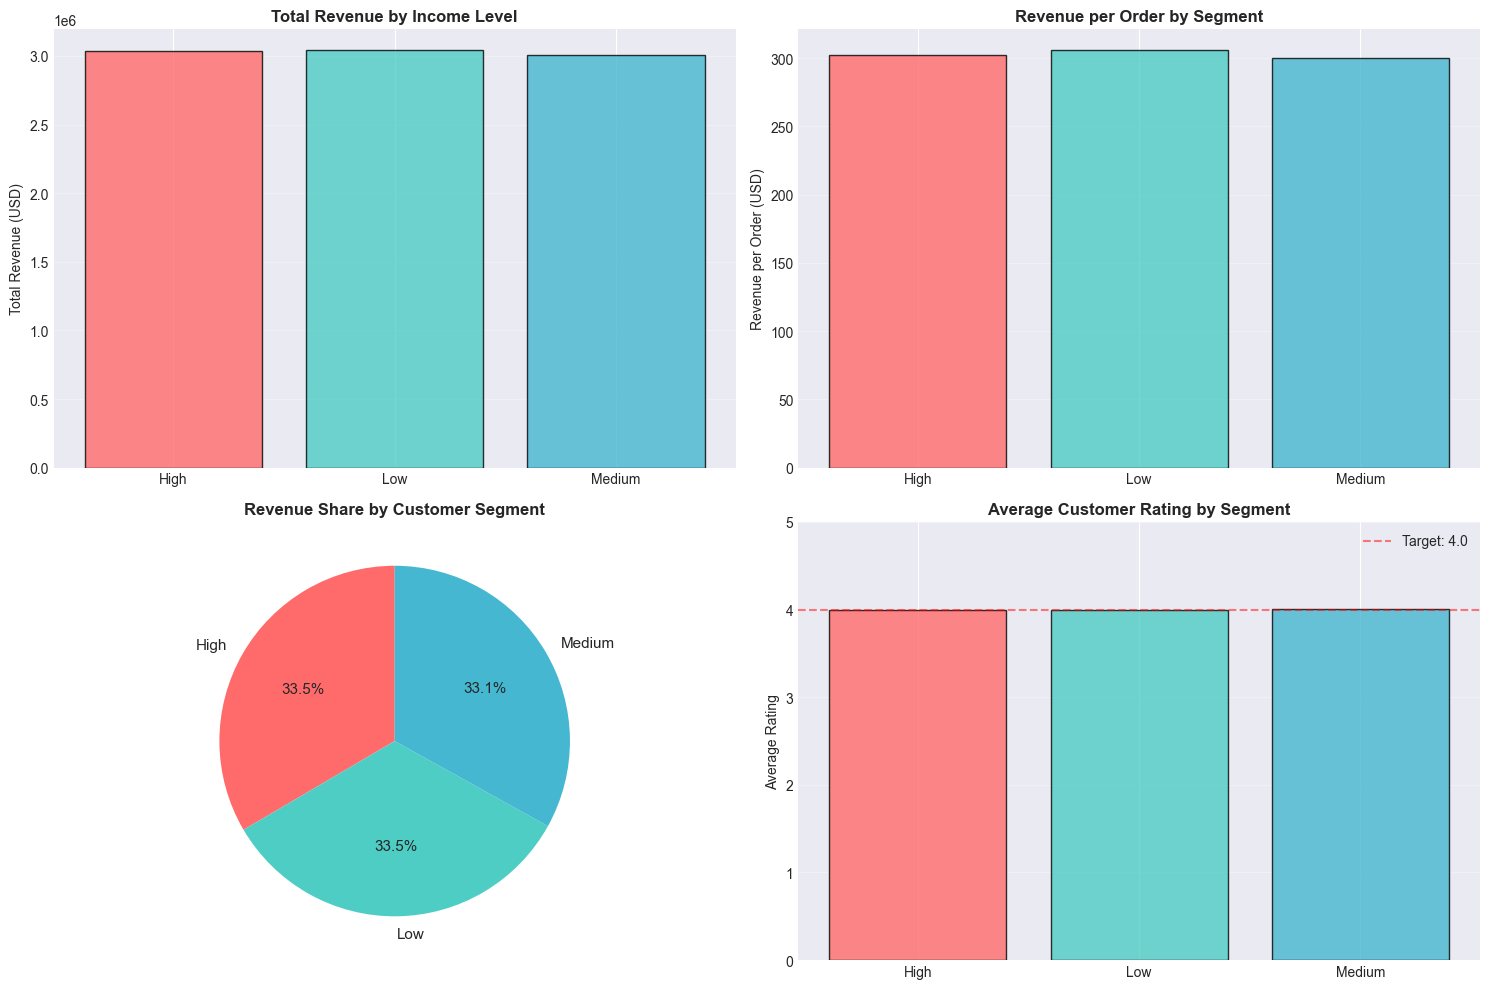


📊 EXPLANATION:
Top Left: Shows which segment generates most total revenue
Top Right: Shows average spending per transaction - higher is better
Bottom Left: The pie chart visualizes market share by segment
Bottom Right: Customer satisfaction levels by segment


In [11]:
# Visualize customer segments
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

colors = ['#FF6B6B', '#4ECDC4', '#45B7D1']

# 1. Revenue by income level
axes[0, 0].bar(income_analysis['Income Level'], 
               income_analysis['Total Revenue'],
               color=colors, edgecolor='black', alpha=0.8)
axes[0, 0].set_title('Total Revenue by Income Level', fontweight='bold', fontsize=12)
axes[0, 0].set_ylabel('Total Revenue (USD)')
axes[0, 0].grid(axis='y', alpha=0.3)

# 2. Average transaction value
axes[0, 1].bar(income_analysis['Income Level'], 
               income_analysis['Revenue per Order'],
               color=colors, edgecolor='black', alpha=0.8)
axes[0, 1].set_title('Revenue per Order by Segment', fontweight='bold', fontsize=12)
axes[0, 1].set_ylabel('Revenue per Order (USD)')
axes[0, 1].grid(axis='y', alpha=0.3)

# 3. Revenue contribution pie
axes[1, 0].pie(income_analysis['Total Revenue'], 
               labels=income_analysis['Income Level'],
               autopct='%1.1f%%', startangle=90,
               colors=colors, textprops={'fontsize': 11})
axes[1, 0].set_title('Revenue Share by Customer Segment', fontweight='bold', fontsize=12)

# 4. Customer ratings by income level
axes[1, 1].bar(income_analysis['Income Level'], 
               income_analysis['Avg Rating'],
               color=colors, edgecolor='black', alpha=0.8)
axes[1, 1].set_title('Average Customer Rating by Segment', fontweight='bold', fontsize=12)
axes[1, 1].set_ylabel('Average Rating')
axes[1, 1].set_ylim(0, 5)
axes[1, 1].grid(axis='y', alpha=0.3)
axes[1, 1].axhline(y=4, color='red', linestyle='--', alpha=0.5, label='Target: 4.0')
axes[1, 1].legend()

plt.tight_layout()
plt.show()

print("\n📊 EXPLANATION:")
print("Top Left: Shows which segment generates most total revenue")
print("Top Right: Shows average spending per transaction - higher is better")
print("Bottom Left: The pie chart visualizes market share by segment")
print("Bottom Right: Customer satisfaction levels by segment")

=== Top 10 Countries by Revenue ===
    Country  Total Revenue  Total Orders  Total Units  Avg Rating  Revenue %
3       UAE     1546442.55          5118        12818    4.008832  17.028589
4        UK     1532300.05          5058        12662    4.004784  16.872860
1     India     1520898.95          4991        12539    3.998437  16.747317
5       USA     1511747.45          5027        12472    3.990113  16.646546
0   Germany     1503894.85          4965        12452    4.000584  16.560077
2  Pakistan     1466164.60          4841        12063    4.006507  16.144612


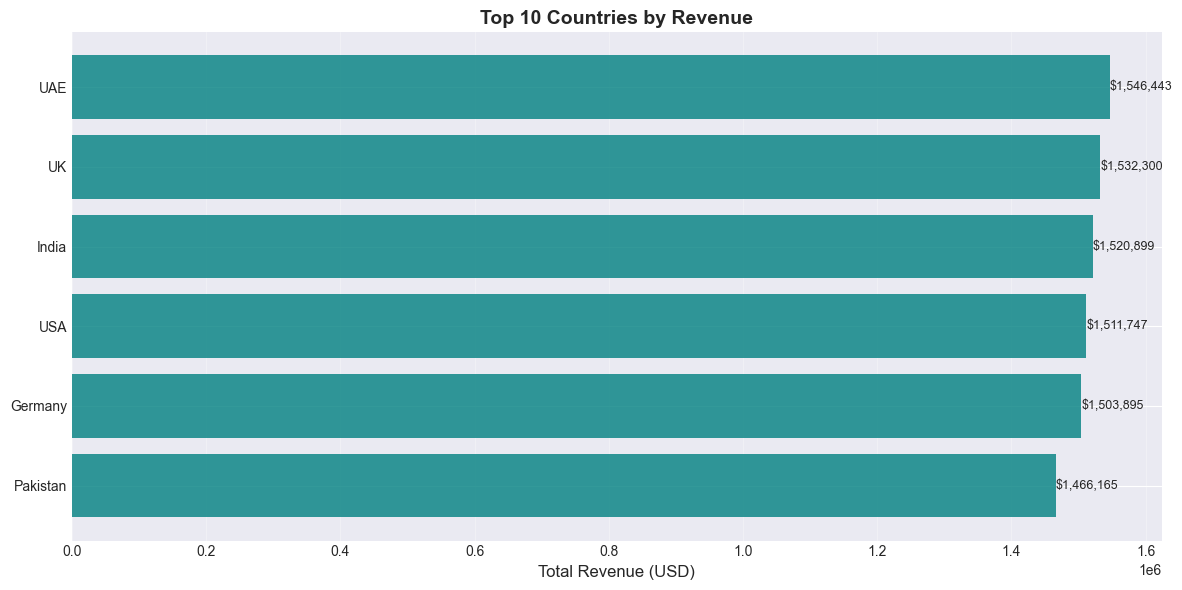


 EXPLANATION:
This shows which geographic markets are most valuable.
Use this to prioritize:
  • Marketing spend allocation
  • Inventory distribution
  • Customer service resources


In [13]:
# Geographic segmentation (Country-level)
country_analysis = df.groupby('country').agg({
    'revenue_usd': 'sum',
    'order_id': 'count',
    'units_sold': 'sum',
    'customer_rating': 'mean'
}).reset_index().sort_values('revenue_usd', ascending=False)

country_analysis.columns = ['Country', 'Total Revenue', 'Total Orders', 'Total Units', 'Avg Rating']
country_analysis['Revenue %'] = (country_analysis['Total Revenue'] / 
                                 country_analysis['Total Revenue'].sum() * 100)

print("=== Top 10 Countries by Revenue ===")
print(country_analysis.head(10))

# Visualize top countries
plt.figure(figsize=(12, 6))
top_countries = country_analysis.head(10)
bars = plt.barh(top_countries['Country'], top_countries['Total Revenue'], color='teal', alpha=0.8)
plt.xlabel('Total Revenue (USD)', fontsize=12)
plt.title('Top 10 Countries by Revenue', fontweight='bold', fontsize=14)
plt.gca().invert_yaxis()
plt.grid(axis='x', alpha=0.3)

# Add value labels
for i, (bar, val) in enumerate(zip(bars, top_countries['Total Revenue'])):
    plt.text(val, bar.get_y() + bar.get_height()/2, f'${val:,.0f}', 
             va='center', ha='left', fontsize=9)

plt.tight_layout()
plt.show()

print("\n EXPLANATION:")
print("This shows which geographic markets are most valuable.")
print("Use this to prioritize:")
print("  • Marketing spend allocation")
print("  • Inventory distribution")
print("  • Customer service resources")

=== Performance by Sales Channel ===
  Sales Channel  Total Revenue  Total Orders  Avg Rating  Revenue per Order
0        Online     4540629.20         14991    3.998139         302.890348
1  Retail Store     4540819.25         15009    4.004944         302.539759


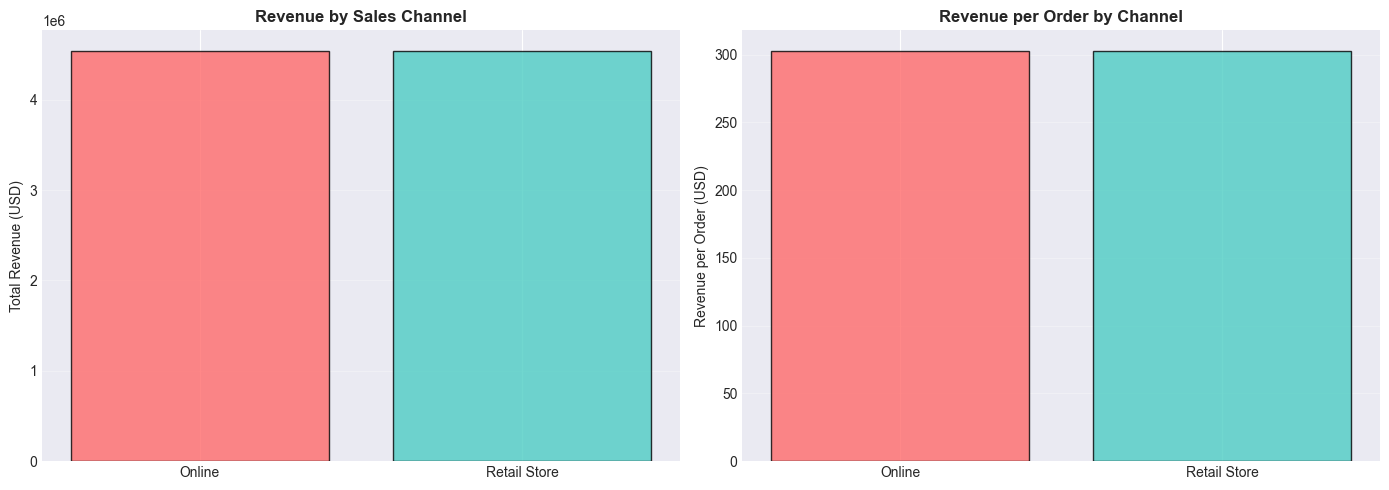

In [13]:
# Sales channel analysis
channel_analysis = df.groupby('sales_channel').agg({
    'revenue_usd': 'sum',
    'order_id': 'count',
    'customer_rating': 'mean'
}).reset_index()

channel_analysis.columns = ['Sales Channel', 'Total Revenue', 'Total Orders', 'Avg Rating']
channel_analysis['Revenue per Order'] = channel_analysis['Total Revenue'] / channel_analysis['Total Orders']

print("=== Performance by Sales Channel ===")
print(channel_analysis)

# Visualize
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].bar(channel_analysis['Sales Channel'], channel_analysis['Total Revenue'],
            color=['#FF6B6B', '#4ECDC4'], alpha=0.8, edgecolor='black')
axes[0].set_title('Revenue by Sales Channel', fontweight='bold', fontsize=12)
axes[0].set_ylabel('Total Revenue (USD)')
axes[0].grid(axis='y', alpha=0.3)

axes[1].bar(channel_analysis['Sales Channel'], channel_analysis['Revenue per Order'],
            color=['#FF6B6B', '#4ECDC4'], alpha=0.8, edgecolor='black')
axes[1].set_title('Revenue per Order by Channel', fontweight='bold', fontsize=12)
axes[1].set_ylabel('Revenue per Order (USD)')
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

---
## Analysis 3: Trend Analysis 🔥

**Goal:** Identify popular brands, colors, and categories

**Why it matters:**
- Know what's in demand
- Create optimal inventory strategy
- Focus on winning products
- Spot emerging trends early

**How we do it:**
1. Analyze brand popularity and market share
2. Identify best-selling categories
3. Track color and style preferences
4. Monitor trends over time

**Key Metric:** Market share by brand and category

In [21]:
# Brand analysis
brand_analysis = df.groupby('brand').agg({
    'revenue_usd': 'sum',
    'units_sold': 'sum',
    'order_id': 'count',
    'customer_rating': 'mean',
    'discount_percent': 'mean'
}).reset_index().sort_values('revenue_usd', ascending=False)

brand_analysis.columns = ['Brand', 'Total Revenue', 'Total Units', 
                          'Total Orders', 'Avg Rating', 'Avg Discount']
brand_analysis['Market Share %'] = (brand_analysis['Total Revenue'] / 
                                    brand_analysis['Total Revenue'].sum() * 100)
brand_analysis['Revenue per Unit'] = brand_analysis['Total Revenue'] / brand_analysis['Total Units']

print("=== Brand Performance Analysis ===")
print(brand_analysis)

print("\n=== Market Share Ranking ===")
for i, row in brand_analysis.iterrows():
    print(f"{i+1}. {row['Brand']:15s} - {row['Market Share %']:5.1f}% market share")

print("\n EXPLANATION:")
print("Market Share % shows each brand's portion of total revenue.")
print("Revenue per Unit indicates premium positioning - higher means more expensive products.")
print("Avg Rating shows customer satisfaction with each brand.")

=== Brand Performance Analysis ===
         Brand  Total Revenue  Total Units  Total Orders  Avg Rating  \
0        ASICS     1561462.50        12874          5132    4.008944   
3         Nike     1524582.10        12481          5018    3.998366   
2  New Balance     1511401.50        12541          4982    3.998434   
4         Puma     1499094.90        12315          4924    4.002600   
5       Reebok     1498640.90        12469          5026    4.012396   
1       Adidas     1486266.55        12326          4918    3.988064   

   Avg Discount  Market Share %  Revenue per Unit  
0     13.302806       17.193981        121.288061  
3     13.190514       16.787874        122.152239  
2     13.269771       16.642736        120.516825  
4     13.539805       16.507222        121.729184  
5     13.218265       16.502223        120.189342  
1     13.479057       16.365964        120.579795  

=== Market Share Ranking ===
1. ASICS           -  17.2% market share
4. Nike            -  16.

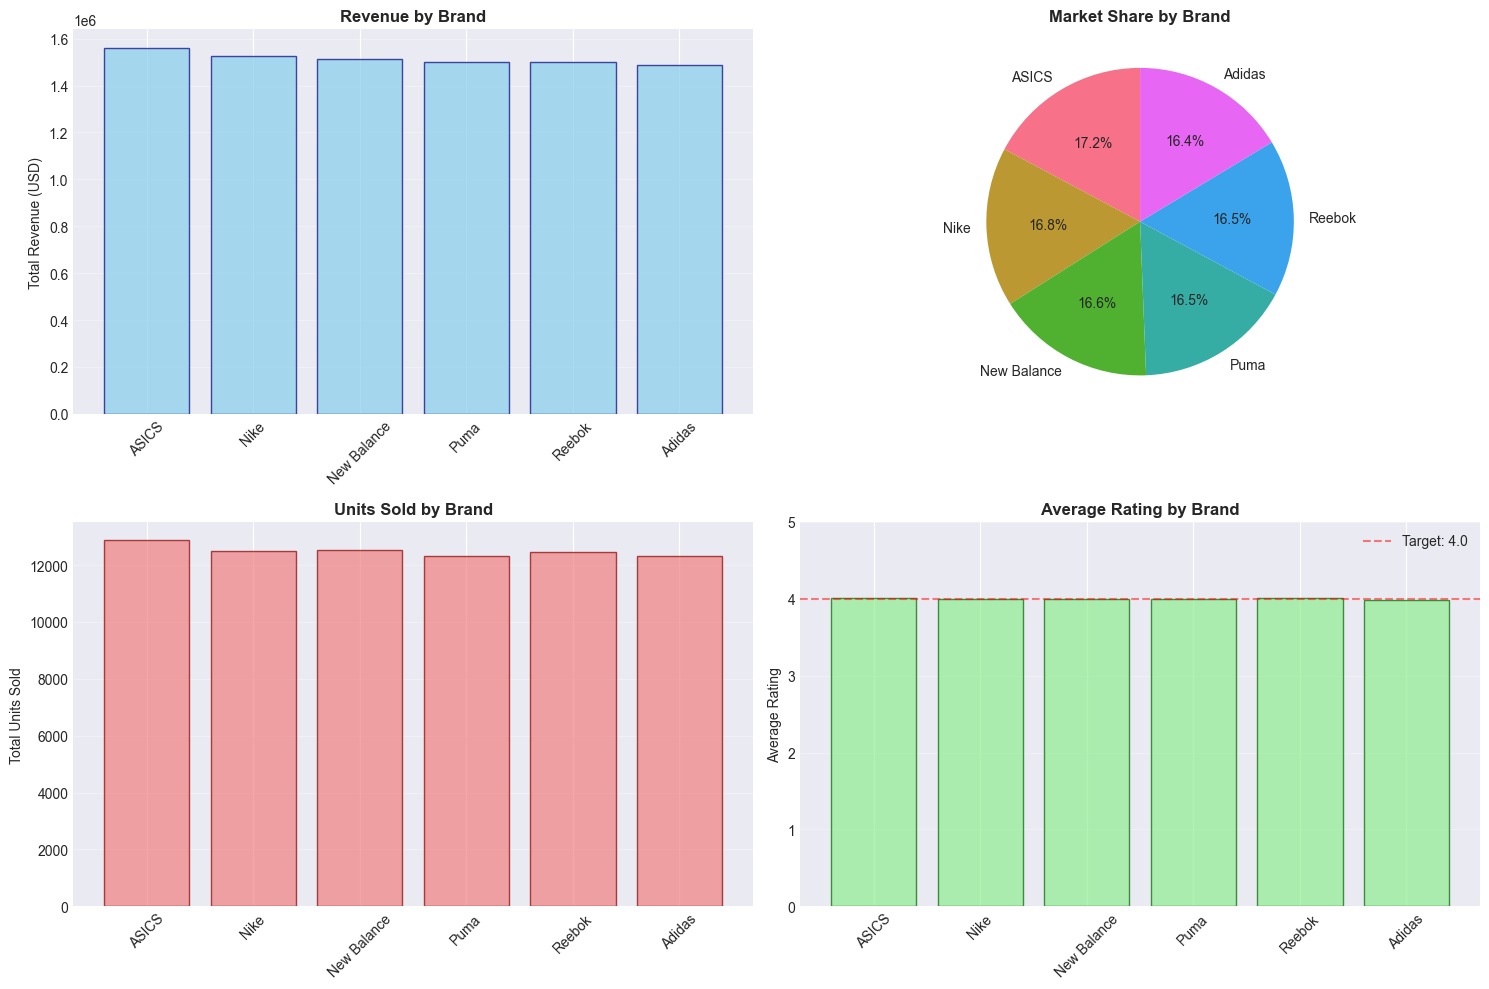

In [15]:
# Visualize brand performance
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# 1. Revenue by brand
axes[0, 0].bar(brand_analysis['Brand'], brand_analysis['Total Revenue'], 
               color='skyblue', edgecolor='navy', alpha=0.7)
axes[0, 0].set_title('Revenue by Brand', fontweight='bold', fontsize=12)
axes[0, 0].set_ylabel('Total Revenue (USD)')
axes[0, 0].tick_params(axis='x', rotation=45)
axes[0, 0].grid(axis='y', alpha=0.3)

# 2. Market share pie
axes[0, 1].pie(brand_analysis['Total Revenue'], labels=brand_analysis['Brand'],
               autopct='%1.1f%%', startangle=90, textprops={'fontsize': 10})
axes[0, 1].set_title('Market Share by Brand', fontweight='bold', fontsize=12)

# 3. Units sold by brand
axes[1, 0].bar(brand_analysis['Brand'], brand_analysis['Total Units'],
               color='lightcoral', edgecolor='darkred', alpha=0.7)
axes[1, 0].set_title('Units Sold by Brand', fontweight='bold', fontsize=12)
axes[1, 0].set_ylabel('Total Units Sold')
axes[1, 0].tick_params(axis='x', rotation=45)
axes[1, 0].grid(axis='y', alpha=0.3)

# 4. Average rating by brand
axes[1, 1].bar(brand_analysis['Brand'], brand_analysis['Avg Rating'],
               color='lightgreen', edgecolor='darkgreen', alpha=0.7)
axes[1, 1].set_title('Average Rating by Brand', fontweight='bold', fontsize=12)
axes[1, 1].set_ylabel('Average Rating')
axes[1, 1].set_ylim(0, 5)
axes[1, 1].tick_params(axis='x', rotation=45)
axes[1, 1].axhline(y=4, color='red', linestyle='--', alpha=0.5, label='Target: 4.0')
axes[1, 1].grid(axis='y', alpha=0.3)
axes[1, 1].legend()

plt.tight_layout()
plt.show()

=== Category Performance ===
     Category  Total Revenue  Total Units  Total Orders  Avg Rating  \
2   Lifestyle     1844628.75        15129          6059    3.992144   
4    Training     1836338.65        15142          6018    3.999269   
0  Basketball     1822369.65        15160          6074    3.997284   
3     Running     1805450.70        14928          5983    4.014374   
1         Gym     1772660.70        14647          5866    4.004910   

    Avg Price  Revenue %  
2  121.923676  20.312054  
4  121.575033  20.220768  
0  119.928630  20.066949  
3  120.804496  19.880647  
1  120.913254  19.519581  

=== Top 3 Categories ===
1. Lifestyle    - $1,844,629 (20.3%)
2. Training     - $1,836,339 (20.2%)
3. Basketball   - $1,822,370 (20.1%)


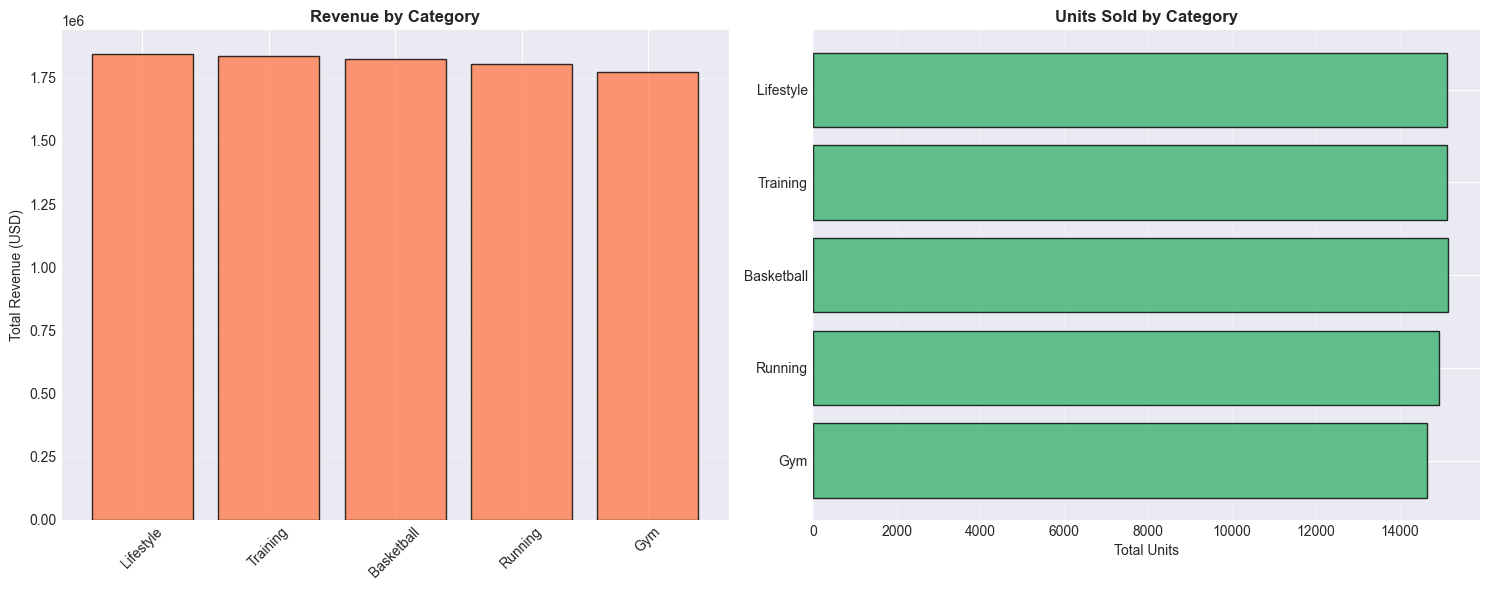


 EXPLANATION:
This shows which product categories are most popular.
Use this to guide:
  • Product development priorities
  • Inventory investment decisions
  • Marketing campaign focus


In [14]:
# Category analysis
category_analysis = df.groupby('category').agg({
    'revenue_usd': 'sum',
    'units_sold': 'sum',
    'order_id': 'count',
    'customer_rating': 'mean',
    'final_price_usd': 'mean'
}).reset_index().sort_values('revenue_usd', ascending=False)

category_analysis.columns = ['Category', 'Total Revenue', 'Total Units', 
                             'Total Orders', 'Avg Rating', 'Avg Price']
category_analysis['Revenue %'] = (category_analysis['Total Revenue'] / 
                                  category_analysis['Total Revenue'].sum() * 100)

print("=== Category Performance ===")
print(category_analysis)

print("\n=== Top 3 Categories ===")
for i in range(min(3, len(category_analysis))):
    row = category_analysis.iloc[i]
    print(f"{i+1}. {row['Category']:12s} - ${row['Total Revenue']:,.0f} ({row['Revenue %']:.1f}%)")

# Visualize
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

axes[0].bar(category_analysis['Category'], category_analysis['Total Revenue'],
            color='coral', alpha=0.8, edgecolor='black')
axes[0].set_title('Revenue by Category', fontweight='bold', fontsize=12)
axes[0].set_ylabel('Total Revenue (USD)')
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(axis='y', alpha=0.3)

axes[1].barh(category_analysis['Category'], category_analysis['Total Units'],
             color='mediumseagreen', alpha=0.8, edgecolor='black')
axes[1].set_title('Units Sold by Category', fontweight='bold', fontsize=12)
axes[1].set_xlabel('Total Units')
axes[1].invert_yaxis()
axes[1].grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

print("\n EXPLANATION:")
print("This shows which product categories are most popular.")
print("Use this to guide:")
print("  • Product development priorities")
print("  • Inventory investment decisions")
print("  • Marketing campaign focus")

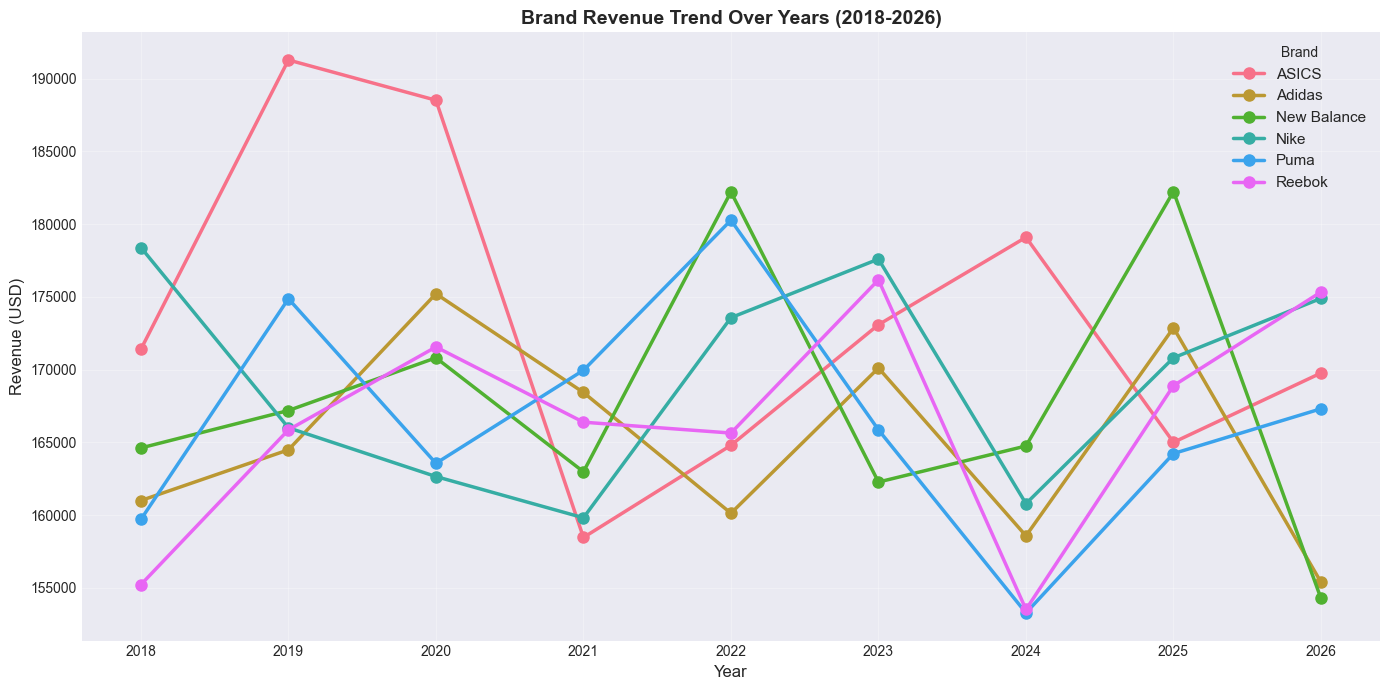


 EXPLANATION:
This chart shows how brand popularity has changed over the years.
Look for:
  • Growing brands (upward slopes) - invest here
  • Declining brands (downward slopes) - may need intervention
  • Stable brands (flat lines) - consistent performers


In [19]:
# Trend over time (brand popularity by year)
brand_time = df.groupby(['year', 'brand'])['revenue_usd'].sum().reset_index()
brand_pivot = brand_time.pivot(index='year', columns='brand', values='revenue_usd')

plt.figure(figsize=(14, 7))
for brand in brand_pivot.columns:
    plt.plot(brand_pivot.index, brand_pivot[brand], marker='o', label=brand, linewidth=2.5, markersize=8)

plt.title('Brand Revenue Trend Over Years (2018-2026)', fontweight='bold', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Revenue (USD)', fontsize=12)
plt.legend(title='Brand', loc='best', fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("\n EXPLANATION:")
print("This chart shows how brand popularity has changed over the years.")
print("Look for:")
print("  • Growing brands (upward slopes) - invest here")
print("  • Declining brands (downward slopes) - may need intervention")
print("  • Stable brands (flat lines) - consistent performers")

=== Performance by Gender Category ===
   Gender  Total Revenue  Total Units  Total Orders
2   Women     3085078.30        25401         10057
0     Men     3026815.45        25103         10075
1  Unisex     2969554.70        24502          9868


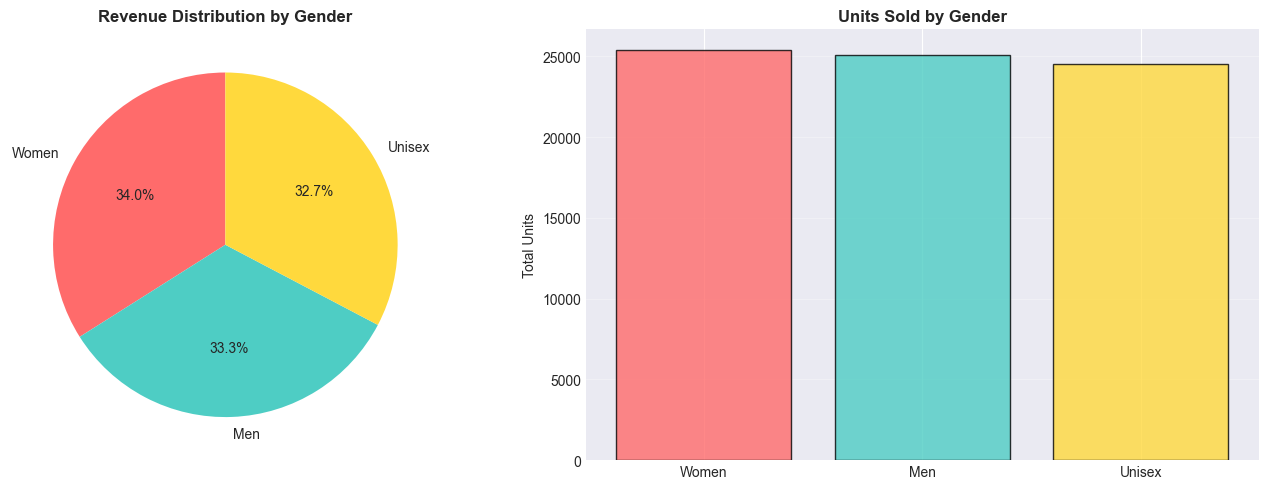

In [19]:
# Gender preference analysis
gender_analysis = df.groupby('gender').agg({
    'revenue_usd': 'sum',
    'units_sold': 'sum',
    'order_id': 'count'
}).reset_index().sort_values('revenue_usd', ascending=False)

gender_analysis.columns = ['Gender', 'Total Revenue', 'Total Units', 'Total Orders']

print("=== Performance by Gender Category ===")
print(gender_analysis)

# Visualize
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].pie(gender_analysis['Total Revenue'], labels=gender_analysis['Gender'],
            autopct='%1.1f%%', startangle=90, colors=['#FF6B6B', '#4ECDC4', '#FFD93D'])
axes[0].set_title('Revenue Distribution by Gender', fontweight='bold', fontsize=12)

axes[1].bar(gender_analysis['Gender'], gender_analysis['Total Units'],
            color=['#FF6B6B', '#4ECDC4', '#FFD93D'], alpha=0.8, edgecolor='black')
axes[1].set_title('Units Sold by Gender', fontweight='bold', fontsize=12)
axes[1].set_ylabel('Total Units')
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

In [15]:
# Overall rating statistics
print("=== Overall Rating Statistics ===")
print(f"Mean Rating: {df['customer_rating'].mean():.2f} / 5.0")
print(f"Median Rating: {df['customer_rating'].median():.2f} / 5.0")
print(f"Std Dev: {df['customer_rating'].std():.2f}")
print(f"Min Rating: {df['customer_rating'].min():.1f}")
print(f"Max Rating: {df['customer_rating'].max():.1f}")

# Count by rating ranges
print("\n=== Rating Distribution ===")
print(f"Excellent (4.5-5.0): {len(df[df['customer_rating'] >= 4.5]):,} orders ({len(df[df['customer_rating'] >= 4.5])/len(df)*100:.1f}%)")
print(f"Good (3.5-4.4): {len(df[(df['customer_rating'] >= 3.5) & (df['customer_rating'] < 4.5)]):,} orders ({len(df[(df['customer_rating'] >= 3.5) & (df['customer_rating'] < 4.5)])/len(df)*100:.1f}%)")
print(f"Fair (2.5-3.4): {len(df[(df['customer_rating'] >= 2.5) & (df['customer_rating'] < 3.5)]):,} orders ({len(df[(df['customer_rating'] >= 2.5) & (df['customer_rating'] < 3.5)])/len(df)*100:.1f}%)")
print(f"Poor (<2.5): {len(df[df['customer_rating'] < 2.5]):,} orders ({len(df[df['customer_rating'] < 2.5])/len(df)*100:.1f}%)")

avg_rating = df['customer_rating'].mean()
if avg_rating >= 4.0:
    print(f"\n Overall customer satisfaction is GOOD ({avg_rating:.2f}/5.0)")
elif avg_rating >= 3.5:
    print(f"\n Overall customer satisfaction is MODERATE ({avg_rating:.2f}/5.0) - room for improvement")
else:
    print(f"\n Overall customer satisfaction is LOW ({avg_rating:.2f}/5.0) - needs attention!")

=== Overall Rating Statistics ===
Mean Rating: 4.00 / 5.0
Median Rating: 4.00 / 5.0
Std Dev: 0.58
Min Rating: 3.0
Max Rating: 5.0

=== Rating Distribution ===
Excellent (4.5-5.0): 8,233 orders (27.4%)
Good (3.5-4.4): 14,983 orders (49.9%)
Fair (2.5-3.4): 6,784 orders (22.6%)
Poor (<2.5): 0 orders (0.0%)

 Overall customer satisfaction is GOOD (4.00/5.0)


=== Performance by Rating Category ===
    Rating Category  Order Count  Total Revenue  Total Units  Percentage  \
0       Poor (≤2.5)            0           0.00            0    0.000000   
1    Fair (2.6-3.5)         8241     2488459.35        20555   27.470000   
2    Good (3.6-4.5)        15013     4563579.05        37599   50.043333   
3  Excellent (>4.5)         6746     2029410.05        16852   22.486667   

   Revenue per Order  
0                NaN  
1         301.960848  
2         303.975158  
3         300.831611  


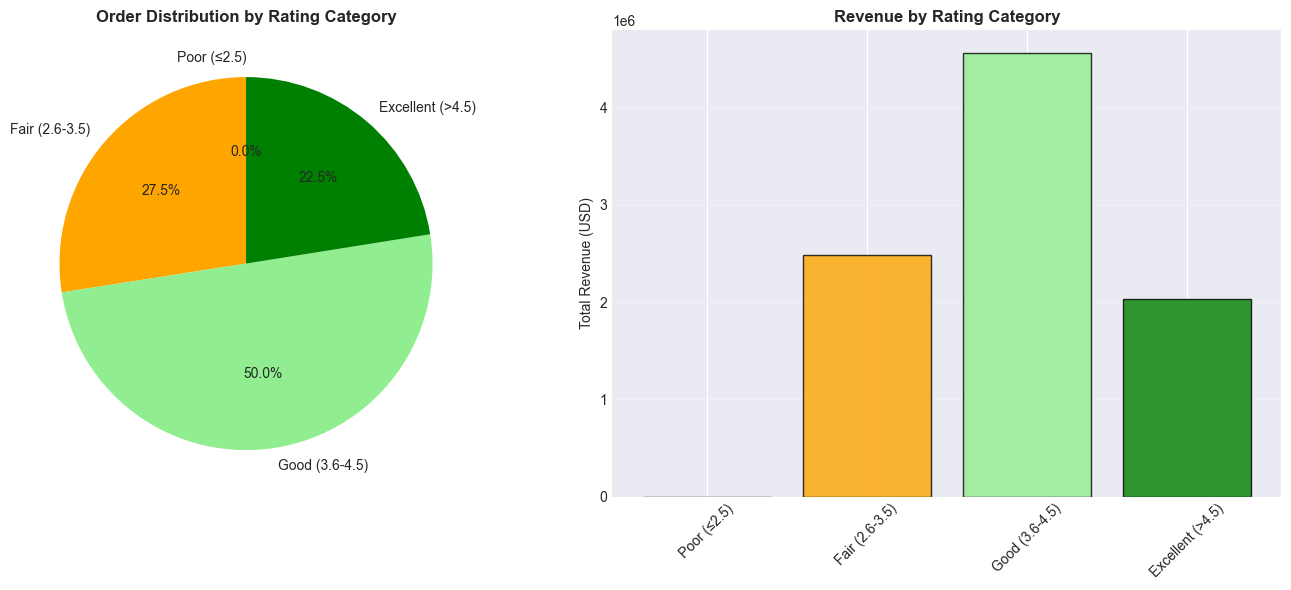


 EXPLANATION:
Left: Shows what percentage of orders fall into each rating category
Right: Shows if better-rated products generate more revenue

Ideal scenario: Most orders in 'Good' or 'Excellent' categories


In [17]:
# Create rating categories
df['rating_category'] = pd.cut(df['customer_rating'],
                               bins=[0, 2.5, 3.5, 4.5, 5.0],
                               labels=['Poor (≤2.5)', 'Fair (2.6-3.5)', 
                                      'Good (3.6-4.5)', 'Excellent (>4.5)'])

rating_cat_analysis = df.groupby('rating_category').agg({
    'order_id': 'count',
    'revenue_usd': 'sum',
    'units_sold': 'sum'
}).reset_index()

rating_cat_analysis.columns = ['Rating Category', 'Order Count', 'Total Revenue', 'Total Units']
rating_cat_analysis['Percentage'] = (rating_cat_analysis['Order Count'] / 
                                     rating_cat_analysis['Order Count'].sum() * 100)
rating_cat_analysis['Revenue per Order'] = (rating_cat_analysis['Total Revenue'] / 
                                            rating_cat_analysis['Order Count'])

print("=== Performance by Rating Category ===")
print(rating_cat_analysis)

# Visualize
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Distribution pie
colors_pie = ['red', 'orange', 'lightgreen', 'green']
axes[0].pie(rating_cat_analysis['Order Count'], 
            labels=rating_cat_analysis['Rating Category'],
            autopct='%1.1f%%', startangle=90, colors=colors_pie)
axes[0].set_title('Order Distribution by Rating Category', fontweight='bold', fontsize=12)

# Revenue by rating category
axes[1].bar(rating_cat_analysis['Rating Category'], 
            rating_cat_analysis['Total Revenue'],
            color=colors_pie, edgecolor='black', alpha=0.8)
axes[1].set_title('Revenue by Rating Category', fontweight='bold', fontsize=12)
axes[1].set_ylabel('Total Revenue (USD)')
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print("\n EXPLANATION:")
print("Left: Shows what percentage of orders fall into each rating category")
print("Right: Shows if better-rated products generate more revenue")
print("\nIdeal scenario: Most orders in 'Good' or 'Excellent' categories")

In [18]:
# Identify best and worst performing products (by brand-category combination)
brand_cat_ratings = df.groupby(['brand', 'category']).agg({
    'customer_rating': 'mean',
    'order_id': 'count',
    'revenue_usd': 'sum'
}).reset_index()

brand_cat_ratings.columns = ['Brand', 'Category', 'Avg Rating', 'Orders', 'Revenue']

# Filter for statistical significance (at least 10 orders)
brand_cat_ratings = brand_cat_ratings[brand_cat_ratings['Orders'] >= 10]

print("=== Top 10 Best Rated Products (Brand-Category Combinations) ===")
best_products = brand_cat_ratings.nlargest(10, 'Avg Rating')
print(best_products.to_string(index=False))

print("\n=== Bottom 10 Worst Rated Products (Brand-Category Combinations) ===")
worst_products = brand_cat_ratings.nsmallest(10, 'Avg Rating')
print(worst_products.to_string(index=False))

print("\n EXPLANATION:")
print("Best rated products: These are your stars - promote them heavily!")
print("Worst rated products: These need attention:")
print("  • Investigate quality issues")
print("  • Consider discontinuing or improving")
print("  • Review supplier relationships")
print("\nNote: Only showing combinations with at least 10 orders for statistical relevance.")

=== Top 10 Best Rated Products (Brand-Category Combinations) ===
      Brand   Category  Avg Rating  Orders   Revenue
       Puma    Running    4.048404     971 295246.95
      ASICS        Gym    4.039841    1009 308507.10
      ASICS    Running    4.037688     995 303161.40
New Balance    Running    4.020175    1026 308533.05
New Balance   Training    4.020096    1040 322023.05
     Reebok    Running    4.017258    1014 309787.15
       Nike  Lifestyle    4.016467    1002 300541.80
     Reebok        Gym    4.016227     986 297825.60
     Reebok Basketball    4.013018    1037 294814.10
     Reebok   Training    4.011735     997 298151.05

=== Bottom 10 Worst Rated Products (Brand-Category Combinations) ===
      Brand   Category  Avg Rating  Orders   Revenue
     Adidas   Training    3.972065     988 303434.65
      ASICS  Lifestyle    3.973384    1052 330533.70
New Balance        Gym    3.974019     943 286737.15
     Adidas    Running    3.980262     993 291800.85
       Puma Baske